## Import required library

In [1]:
import pandas as pd


In [2]:
Population=pd.read_csv('PEA11.20231021T221005.csv')

## DATA EXPLORATION

Find out the shape of the read CSV to get an idea of size

In [3]:
Population.shape
print('Number of Rows and Columns respectively:',Population.shape)

Number of Rows and Columns respectively: (11817, 6)


In [4]:
Population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11817 entries, 0 to 11816
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATISTIC Label     11817 non-null  object
 1   Year                11817 non-null  int64 
 2   Single Year of Age  11817 non-null  object
 3   Sex                 11817 non-null  object
 4   UNIT                11817 non-null  object
 5   VALUE               11817 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 554.1+ KB


The dataset, above, was checked to detect any missing/blank values. The number of non-null values match the number of rows
so no missing values detected. 'info() was also used to check the data type of each column in the dataset. This can be later seen when a section of the dataset is displayed

To confirm this, the sum of the blank values are counted and collated for each column as below

In [5]:
Population.isna().sum()

STATISTIC Label       0
Year                  0
Single Year of Age    0
Sex                   0
UNIT                  0
VALUE                 0
dtype: int64

The above only checks for missing value, but sometimes due to data entry, the inputted values could be invalid even if filled in. The code below will utilise a function to check for a list of commonly entered values that wouldn't count as blank but also wouldn't be valid entries so it would be best to replace with 'NaN'

For the function 'count_invalid_entries'



In [6]:
# List of values to search for
invalid_entries = ['n.a', '-','--', 'NA', 'Not Applicable', 'n/a']

#This will now count all the rows that match the list of commonly entered values in place of blanks in data for all columns
#'.lower()'' is used to change both assessed entries and given invalid entries to lowercase to make the function 
#non -sensitive
def count_invalid_entries(dataframe, invalid_entries):
    matching_rows = dataframe[dataframe.apply(lambda row: any(item.lower() in row.values for item in invalid_entries), axis=1)]
    return len(matching_rows)

# Call the function and count matching rows in all columns
count = count_invalid_entries(Population, invalid_entries)
print(f"Number of rows that match the list of strings in all columns: {count}")

Number of rows that match the list of strings in all columns: 0


The function returns no values matching the list inside the whole dataset

Now that missing and invalid values have been confirmed above, duplicate values are detected below and the same idea as above, is used to display the sum of any rows that are similar for **ALL** values in the row

In [7]:
Population.duplicated().sum()
print ('The sum of duplicate rows in the dataset is:',Population.duplicated().sum(),'rows')

The sum of duplicate rows in the dataset is: 0 rows


Below, a snapshot into the first ('.head(5)') and last ('.tail(5)) 5 rows is displayed

This is useful as all column names are displayed at once

In [8]:
Population.head(5)

,STATISTIC Label,Year,Single Year of Age,Sex,UNIT,VALUE
0,Population estimates from 1926,1926,All ages,Both sexes,Number,2971992
1,Population estimates from 1926,1926,All ages,Male,Number,1506889
2,Population estimates from 1926,1926,All ages,Female,Number,1465103
3,Population estimates from 1926,1926,Under 1 year,Both sexes,Number,55391
4,Population estimates from 1926,1926,Under 1 year,Male,Number,28084


In [9]:
Population.tail(5)

,STATISTIC Label,Year,Single Year of Age,Sex,UNIT,VALUE
11812,Population estimates from 1926,2023,98 years,Male,Number,197
11813,Population estimates from 1926,2023,98 years,Female,Number,632
11814,Population estimates from 1926,2023,99 years and over,Both sexes,Number,1600
11815,Population estimates from 1926,2023,99 years and over,Male,Number,352
11816,Population estimates from 1926,2023,99 years and over,Female,Number,1248


From above, it is good to note that 11816 is the designation of the last row in the dataset. This is important as the rows are read and displayed as integer index unless otherwise assigned

It is also seen that 'VALUE' and 'Year' are the only numerical columns above

This is also corroborated below when '.describe()' was used but '.describe(include=object)' had to be used to show the
remaining categorical columns

In [10]:
Population.describe()

,Year,VALUE
count,11817.000000,1.181700e+04
mean,1996.410256,5.352461e+04
std,24.463165,2.867754e+05
min,1926.000000,6.000000e+00
25%,1986.000000,1.242700e+04
50%,2004.000000,2.667500e+04
75%,2014.000000,3.557700e+04
max,2023.000000,5.281612e+06


As the columns above are numerical values, it is possible to compute some statistics based on the datset

In [11]:
Population.describe(include=object)

,STATISTIC Label,Single Year of Age,Sex,UNIT
count,11817,11817,11817,11817
unique,1,101,3,1
top,Population estimates from 1926,All ages,Both sexes,Number
freq,11817,117,3939,11817


## DATA PREPARATION

From above, it is seen that the columns 'UNIT' and 'STATISTIC LABEL' have only 1 unique value

To make the data more streamlined, the columns with only 1 unique value are dropped as the lack of variation in data would not give much useful info during the analysis.

In [12]:
Population_df=Population.drop(columns=['UNIT','STATISTIC Label'],axis=1,inplace=False)

'inplace' is set to False instead of True so a new variable can be assigned to the modified datafram instead of mutating the data in place <br><br>
Setting it to False was selected majorly because it would be useful to track any intermediate dataframes, when debugging, created as part of the data preparation process <br><br>
The new shape and first 5 rows of the new modified dataframe is displayed to see the results

In [13]:
Population_df
print('Number of Rows and Columns respectively:',Population_df.shape)
Population_df.head()

Number of Rows and Columns respectively: (11817, 4)


,Year,Single Year of Age,Sex,VALUE
0,1926,All ages,Both sexes,2971992
1,1926,All ages,Male,1506889
2,1926,All ages,Female,1465103
3,1926,Under 1 year,Both sexes,55391
4,1926,Under 1 year,Male,28084


The columns were modified to make more visually readable
The columns 'Single Year of Age' was chnaged to 'Age' and 'VALUE' changed to 'Population' for simplicity and to align with other columns

Note: 'inplace' was set to True as the change in reuslting data is minimal

In [14]:
Population_df.rename(columns={'Single Year of Age': 'Age', 'VALUE': 'Population'}, inplace=True)

The first 5 rows of the newly modified dataset are shown to display the changes

In [15]:
Population_df.head()

,Year,Age,Sex,Population
0,1926,All ages,Both sexes,2971992
1,1926,All ages,Male,1506889
2,1926,All ages,Female,1465103
3,1926,Under 1 year,Both sexes,55391
4,1926,Under 1 year,Male,28084


This section will now look to create a number of sub dataframes to give the data focus on certain aspects. Each year, for each age, is reported with numbers for 'Male', 'Female' and 'Both sexes'
Using a function, 4 different datsets will be created separated by sex:
* Both Sexes: Just the total of femal and male per year
* Male: Only Male population per year
* Female: Only Female population per year
* Male_Female: Population per year without totalling it up using Both sexes

In [16]:
#initialising the function
def split_by_sex(dataframe):
    Both_sexes_df = dataframe[dataframe['Sex'] == 'Both sexes']
    Male_df = dataframe[dataframe['Sex'] == 'Male']
    Female_df = dataframe[dataframe['Sex'] == 'Female']
    Male_Female_df = dataframe[dataframe['Sex'].isin(['Male', 'Female'])]
    return Both_sexes_df, Male_df, Female_df, Male_Female_df

Both_sexes_df, Male_df, Female_df, Male_Female_df = split_by_sex(Population_df)

First 5 rows of all new datasets are displayed below

In [17]:
Both_sexes_df.head()

,Year,Age,Sex,Population
0,1926,All ages,Both sexes,2971992
3,1926,Under 1 year,Both sexes,55391
6,1926,1 year,Both sexes,55876
9,1926,2 years,Both sexes,58273
12,1926,3 years,Both sexes,59050


In [18]:
Male_df.head()

,Year,Age,Sex,Population
1,1926,All ages,Male,1506889
4,1926,Under 1 year,Male,28084
7,1926,1 year,Male,28374
10,1926,2 years,Male,29728
13,1926,3 years,Male,29872


In [19]:
Female_df.head()

,Year,Age,Sex,Population
2,1926,All ages,Female,1465103
5,1926,Under 1 year,Female,27307
8,1926,1 year,Female,27502
11,1926,2 years,Female,28545
14,1926,3 years,Female,29178


In [20]:
Male_Female_df.head()

,Year,Age,Sex,Population
1,1926,All ages,Male,1506889
2,1926,All ages,Female,1465103
4,1926,Under 1 year,Male,28084
5,1926,Under 1 year,Female,27307
7,1926,1 year,Male,28374


## DATA VISUALISATION

To start the visualisations, the matplot library will be imported


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

The first plot trended was to see how the population across all ages changed across the years.

The working data set to be used for this will be one showing all ages and both sexes with no separations

In [22]:
Both_sexes_df.head()

,Year,Age,Sex,Population
0,1926,All ages,Both sexes,2971992
3,1926,Under 1 year,Both sexes,55391
6,1926,1 year,Both sexes,55876
9,1926,2 years,Both sexes,58273
12,1926,3 years,Both sexes,59050


All the visualisations used in this notebook will be governed by principles and recommendations made by  Edward R. Tufte in his book, the visual display of quantitative information (Tufte, 2018) 

As all the other ages were still in the dataset, the data will be filtered to show only rows containing 'All ages' for each year and plotted

In [23]:
keyword = 'All ages'

# Filter rows containing the keyword
allages_both_sexes_df = Both_sexes_df[Both_sexes_df['Age'].str.contains(keyword, case=False)]


allages_both_sexes_df.head()

,Year,Age,Sex,Population
0,1926,All ages,Both sexes,2971992
303,1936,All ages,Both sexes,2968420
606,1946,All ages,Both sexes,2955107
909,1951,All ages,Both sexes,2960593
1212,1961,All ages,Both sexes,2818341


The population graph is then plotted

Points on stylistic choices for the visualisation:
* A line graph is selected as the data to be used is continuous and ordianl, but the aim is to also show the relativity in magnitude as the time period elapses which is a perfect choice for a line graph (Lane, 2003)
* Whitegrid is selected as the optimum style choice to minimise ink and focus on the data. According to Tufte (2018, p. 113), darkgrid adds to the clutter in the graph and doesnt add any meaninful information
* The grid line width is set to 0.4 and thinned out to make it relatively mute compared to the data (Tufte, 2018. pp 115-116)

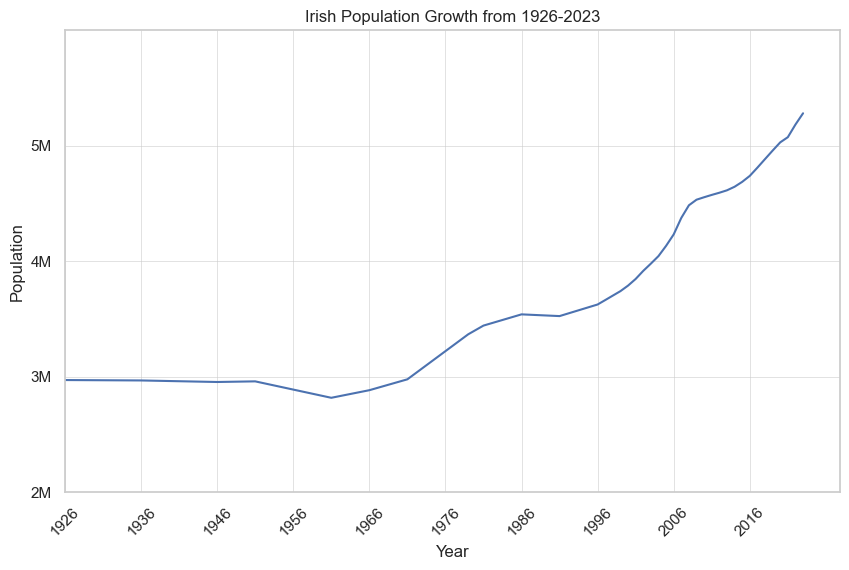

In [155]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.set(style="whitegrid", rc={"grid.linewidth": 0.4})


#No legend is initially put for this graph as its just 1 variable so the legend is set to All ages but made invisible
sns.lineplot(data=allages_both_sexes_df, x='Year', y='Population', label= 'All Ages')


plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Irish Population Growth from 1926-2023')

#Legend made invisible
plt.legend()
plt.legend().set_visible(False)

#Customise axis and Intervals 
plt.xlim(1926, None )  #min and max years of 1926 to the max in the dataset (2023)
plt.xticks(range(1926, 2023,10), rotation=45)  # set axis to increment of 10 years and rotate axis for readability
plt.ylim(2000000, 6000000)  # min and max population of 2M to 6M
plt.yticks(range(2000000,6000000,1000000))  # Set y-axis to increment of 1M
   

#reformat y_axis to have more readable population values
from matplotlib.ticker import FuncFormatter
def reformat_y(y, pos):
    return f'{y / 1000000:.0f}M'

y_format = FuncFormatter(reformat_y)
plt.gca().yaxis.set_major_formatter(y_format)



plt.savefig('Irish Population Growth (1926-2023)', dpi=300, bbox_inches='tight')
plt.show();


On first glance, there is seen to be relatively stable population numbers from 1926-1950 but with an overall increase up until 2023, with decreases in around the years 1950 and 1990

A similar plot is generated to dive deeper into the gender distribution across those years

The datasetused for this will be the Male_Female_df which has the population data without the reference to 'Both sexes'. A new df is created (allages_male_female_df) to remove reference to 'both sexes'


In [25]:
keyword = 'All ages'

# Filter rows containing the keyword
allages_male_female_df = Male_Female_df[Male_Female_df['Age'].str.contains(keyword, case=False)]


allages_male_female_df.head()

,Year,Age,Sex,Population
1,1926,All ages,Male,1506889
2,1926,All ages,Female,1465103
304,1936,All ages,Male,1520454
305,1936,All ages,Female,1447966
607,1946,All ages,Male,1494877


The data will be filtered to show rows representing all ages

Visualisation Stylistic choices
* Line graph used again to show relative increase or decrease 
* Y-Axis reformatted to 1 decimal place as the values are smaller
* Legend displayed and relocated outside the graph for readability
* All other visualisation techniques carried over from previous graph

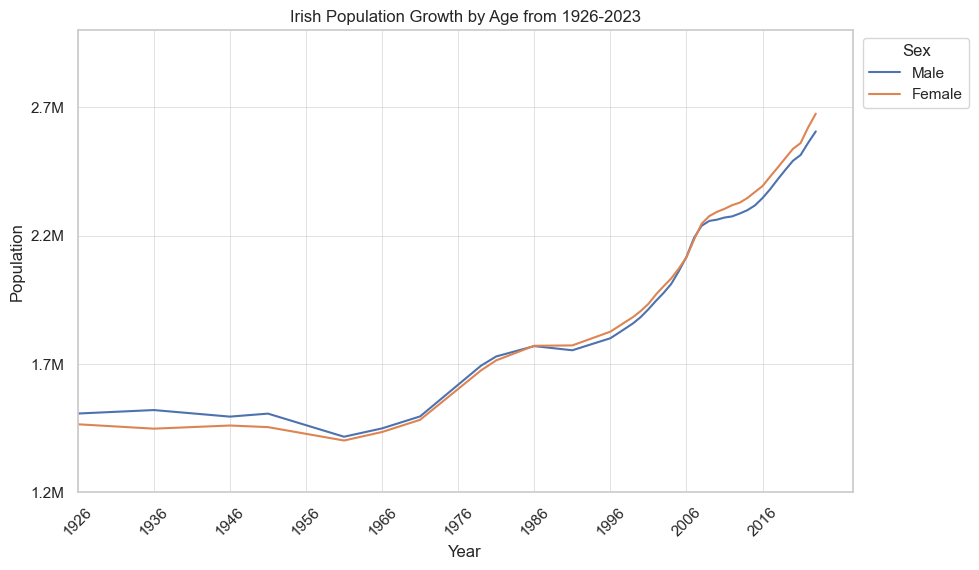

In [26]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", rc={"grid.linewidth": 0.4})



sns.lineplot(data=allages_male_female_df, x='Year', y='Population', hue='Sex')


plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Irish Population Growth by Age from 1926-2023')


plt.legend()
legend = plt.legend(title='Sex',loc="upper right", bbox_to_anchor=(1.16, 1))

#Customise axis and Intervals 

plt.xlim(1926, None)  #min and max years of 1926 to the max in the dataset (2023)
plt.xticks(range(1926, 2023,10), rotation=45)  # set axis to increment of 10 years and rotate axis for readability
plt.ylim(1500000, 3000000)  # min and max population of 2M to 3M
plt.yticks(range(1200000,3000000,500000))  # Set y-axis to increment of 1M
   

#reformat y_axis to have more readable population values
#the code from previous section is modified to display 1 decimal place as the value scales are smaller
from matplotlib.ticker import FuncFormatter
def reformat_y(y, pos):
    return f'{y / 1000000:.1f}M'

y_format = FuncFormatter(reformat_y)
plt.gca().yaxis.set_major_formatter(y_format)



plt.show();


From 1926 up until 1986, it is seen, the male population was always more than the female population from which the opposite has now been the case where the femal population is now more than the male populatoin up until 2023

Now that the gender distribution has been visualised, more information can be gotten from how that age is distributed across the years

The dataframe to be used is the 'Both_sexes_df' which will be further filtered to remove the reference to all ages

In [27]:
keyword = 'All ages'

# Filter rows containing the keyword
ages_both_sexes_df = Both_sexes_df[~Both_sexes_df['Age'].str.contains(keyword, case=False)]


ages_both_sexes_df.head()

,Year,Age,Sex,Population
3,1926,Under 1 year,Both sexes,55391
6,1926,1 year,Both sexes,55876
9,1926,2 years,Both sexes,58273
12,1926,3 years,Both sexes,59050
15,1926,4 years,Both sexes,59123


Now a line graph will be plotted for age distribution across the years

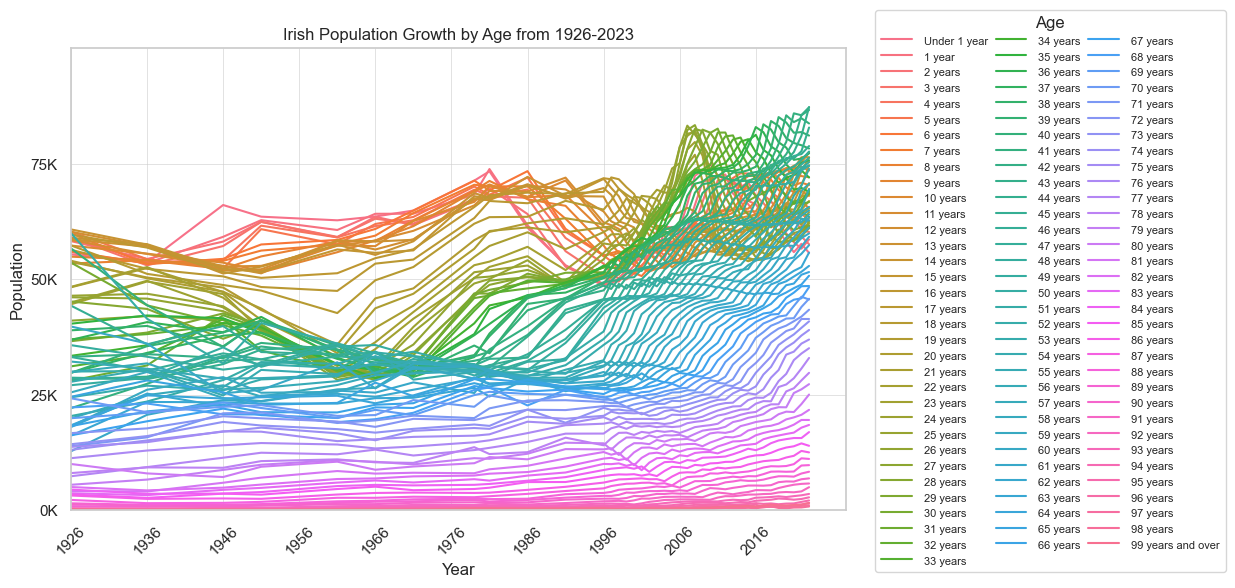

In [28]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", rc={"grid.linewidth": 0.4})
sns.lineplot(data=ages_both_sexes_df, x='Year', y='Population', hue='Age')


plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Irish Population Growth by Age from 1926-2023')


plt.legend()
legend = plt.legend(title='Age',loc="upper right", bbox_to_anchor=(1.5, 1.1), ncols=3, 
                    labelspacing=0.2,columnspacing=0.5,)

#For loop to set legend font size
for text in legend.get_texts():
    text.set_fontsize(8)

#Customise axis and Intervals 

plt.xlim(1926, None)  
plt.xticks(range(1926, 2023,10), rotation=45)  
plt.ylim(0, 100000)
plt.yticks(range(0,100000,25000))  
   

#reformat y_axis to have more readable population values
#the code from previous section is modified to display 1 decimal place as the value scales are smaller
from matplotlib.ticker import FuncFormatter
def reformat_y(y, pos):
    return f'{y / 1000:.0f}K'

y_format = FuncFormatter(reformat_y)
plt.gca().yaxis.set_major_formatter(y_format)



plt.show();


From the visualisation above, the graph is extremely busy and cluttered from the lines to the nuber of legends to the colour scheme. However from the visualisation it is interesting to see how the leading population in the 40's to 80's were the children poulation but as that progressed, the youth to middle-age population start to increase.

To get more meaning out of this data, the population will be divided into 5 age groups. This will be (0-14), (15-24), (25-44), (45-64) and 65+. This classification can be arbitrary, however this is a commonly used classification by the Central Statistics Office Ireland

This filtering will be carried out on the Population_df dataset

In [29]:
Population_df.head()

,Year,Age,Sex,Population
0,1926,All ages,Both sexes,2971992
1,1926,All ages,Male,1506889
2,1926,All ages,Female,1465103
3,1926,Under 1 year,Both sexes,55391
4,1926,Under 1 year,Male,28084


To avoid duplicity of data, all rows showing 'All ages' is removed

In [30]:
word='All ages'

ages_df = Population_df[~Population_df['Age'].str.contains(keyword, case=False)]


ages_df.head()

,Year,Age,Sex,Population
3,1926,Under 1 year,Both sexes,55391
4,1926,Under 1 year,Male,28084
5,1926,Under 1 year,Female,27307
6,1926,1 year,Both sexes,55876
7,1926,1 year,Male,28374


Now the dataset is grouped according to previous classification: (0-14), (15-24), (25-44), (45-64) and 65+

In [31]:
ages_df['Age'].unique()

array(['Under 1 year', '1 year', '2 years', '3 years', '4 years',
       '5 years', '6 years', '7 years', '8 years', '9 years', '10 years',
       '11 years', '12 years', '13 years', '14 years', '15 years',
       '16 years', '17 years', '18 years', '19 years', '20 years',
       '21 years', '22 years', '23 years', '24 years', '25 years',
       '26 years', '27 years', '28 years', '29 years', '30 years',
       '31 years', '32 years', '33 years', '34 years', '35 years',
       '36 years', '37 years', '38 years', '39 years', '40 years',
       '41 years', '42 years', '43 years', '44 years', '45 years',
       '46 years', '47 years', '48 years', '49 years', '50 years',
       '51 years', '52 years', '53 years', '54 years', '55 years',
       '56 years', '57 years', '58 years', '59 years', '60 years',
       '61 years', '62 years', '63 years', '64 years', '65 years',
       '66 years', '67 years', '68 years', '69 years', '70 years',
       '71 years', '72 years', '73 years', '74 years', '

As seen above, there would be an issue with the classification as the ages are reported as strings but also the ages of 'Under 1 year' and '99 years and over' will have to be modified to fit into the age groups of 0-14 and 65+ respectively. It is also good to see all the unique values at a glance to know the best way to manipulate the string

To help with the classification, the regular expression,'re' module will be imported to be able to search for and match the strings that need to be classified. At the end of the classification, a new column, Age_group, will be created

In [32]:
import re

In [33]:
#To match the string values to the predetermined age classification 
#Note: an additoinal reference to '1 year' is added as it is an exception to the 'x years' condition
age_mapping = {
    '0-14 years': [str(i) + ' years' for i in range(1, 15)] + ['Under 1 year']+ ['1 year'],
    '15-24 years': [str(i) + ' years' for i in range(15, 25)],
    '25-44 years': [str(i) + ' years' for i in range(25, 45)],
    '45-64 years': [str(i) + ' years' for i in range(45, 65)],
    '65+ years':[str(i) + ' years' for i in range(65, 100)]+ ['99 years and over']

}

# To extract the numeric part of the 'Age' column and convert it to integers
ages_df['Age_int'] = ages_df['Age'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else x)

# To create new column 'Age_group' post-mapping
ages_df['Age_group'] = ages_df['Age'].apply(lambda x: next((group for group, ages in age_mapping.items() if x in ages), None))





C:\Users\iolajit1\AppData\Local\Temp\1\ipykernel_31580\3675320028.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ages_df['Age_int'] = ages_df['Age'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else x)
C:\Users\iolajit1\AppData\Local\Temp\1\ipykernel_31580\3675320028.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ages_df['Age_group'] = ages_df['Age'].apply(lambda x: next((group for group, ages in age_mapping.items() if x in ages), None))


In [34]:
ages_df.head()

,Year,Age,Sex,Population,Age_int,Age_group
3,1926,Under 1 year,Both sexes,55391,1,0-14 years
4,1926,Under 1 year,Male,28084,1,0-14 years
5,1926,Under 1 year,Female,27307,1,0-14 years
6,1926,1 year,Both sexes,55876,1,0-14 years
7,1926,1 year,Male,28374,1,0-14 years


The dataset will be split into one with 'Both sexes' and the rest

In [35]:
ages_both_sexes_df = ages_df[ages_df['Sex'] == 'Both sexes']
ages_male_female_df = ages_df[~(ages_df['Sex'] == 'Both sexes')]


In [36]:
ages_male_female_df.head()

,Year,Age,Sex,Population,Age_int,Age_group
4,1926,Under 1 year,Male,28084,1,0-14 years
5,1926,Under 1 year,Female,27307,1,0-14 years
7,1926,1 year,Male,28374,1,0-14 years
8,1926,1 year,Female,27502,1,0-14 years
10,1926,2 years,Male,29728,2,0-14 years


In [37]:
ages_both_sexes_df.head()

,Year,Age,Sex,Population,Age_int,Age_group
3,1926,Under 1 year,Both sexes,55391,1,0-14 years
6,1926,1 year,Both sexes,55876,1,0-14 years
9,1926,2 years,Both sexes,58273,2,0-14 years
12,1926,3 years,Both sexes,59050,3,0-14 years
15,1926,4 years,Both sexes,59123,4,0-14 years


2 line graphs will now be plotted, 1 to show the age group population growth in total and the second to show how its distributed by age 

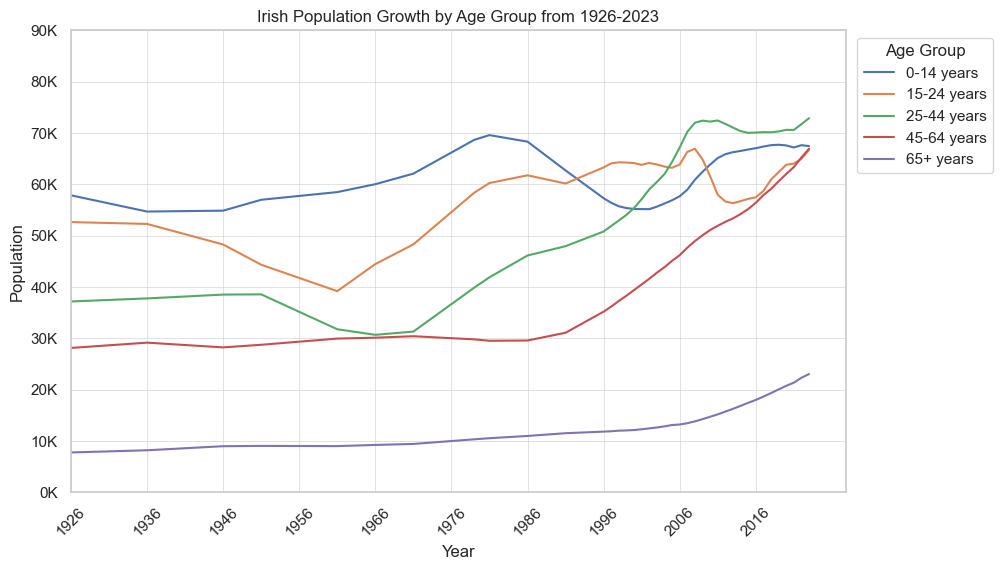

In [38]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", rc={"grid.linewidth": 0.4})
sns.lineplot(data=ages_both_sexes_df, x='Year', y='Population', hue='Age_group', errorbar=None)


plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Irish Population Growth by Age Group from 1926-2023')


plt.legend()
legend = plt.legend(title='Age Group',loc="upper right", bbox_to_anchor=(1.2, 1))


#Customise axis and Intervals 

plt.xlim(1926, None)  
plt.xticks(range(1926, 2023,10), rotation=45)  
plt.ylim(0, 90000)
plt.yticks(range(0,95000,10000))  
   

#reformat y_axis to have more readable population values
#the code from previous section is modified to display 1 decimal place as the value scales are smaller
from matplotlib.ticker import FuncFormatter
def reformat_y(y, pos):
    return f'{y / 1000:.0f}K'

y_format = FuncFormatter(reformat_y)
plt.gca().yaxis.set_major_formatter(y_format)



plt.show();


As seen in the individual age plots as here, the younger population, having being dominant up until the late 70's are now similar enough in population to all other age groups except the 65+ years.

Now the gender distribution in each age group is visualised

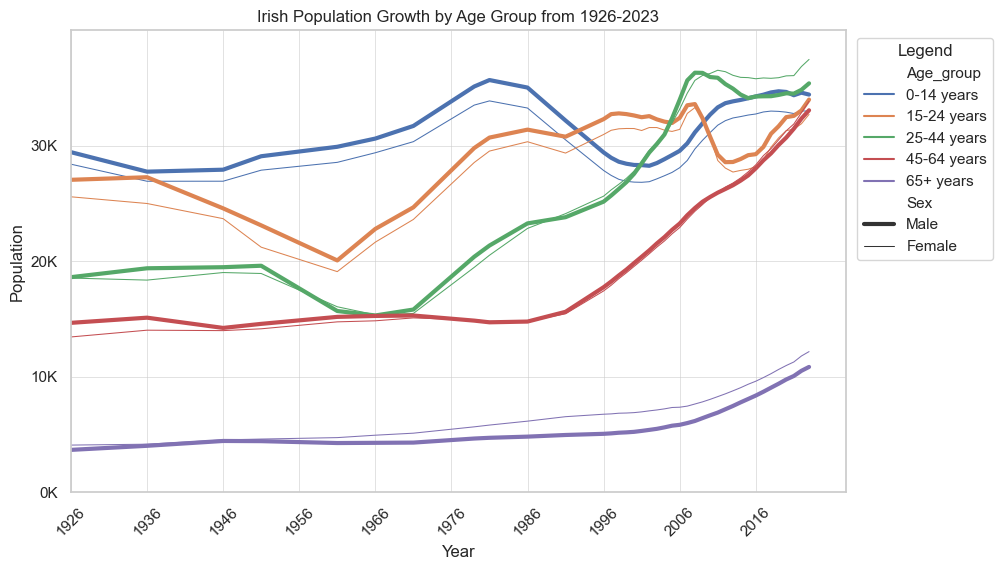

In [39]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", rc={"grid.linewidth": 0.4})
sns.lineplot(data=ages_male_female_df, x='Year', y='Population', hue='Age_group', size='Sex', errorbar=None)


plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Irish Population Growth by Age Group from 1926-2023')


plt.legend()
legend = plt.legend(title='Legend',loc="upper right", bbox_to_anchor=(1.2, 1))


#Customise axis and Intervals 

plt.xlim(1926, None)  
plt.xticks(range(1926, 2023,10), rotation=45)  
plt.ylim(0, 40000)
plt.yticks(range(0,40000,10000))  
   

#reformat y_axis to have more readable population values
#the code from previous section is modified to display 1 decimal place as the value scales are smaller
from matplotlib.ticker import FuncFormatter
def reformat_y(y, pos):
    return f'{y / 1000:.0f}K'

y_format = FuncFormatter(reformat_y)
plt.gca().yaxis.set_major_formatter(y_format)



plt.show();


It is seen that throughout the years, the under 14 population has always been male-dominated, the opposite is of the older population where woman are more in number in the 65+ population, could suggest mortality rate higher in males above 65 years of age.

To have a clearer picture of how the gender is distributed, a pyramid plot will be created using 2 bar plots oriented horizontally, this will be a better way to visualise the extremely cluttered graph early on. To do this the 'ages_male_female_df' will be split into male and female

In [40]:
ages_male_df=ages_male_female_df[(ages_male_female_df['Sex']=='Male')]
ages_female_df=ages_male_female_df[(ages_male_female_df['Sex']=='Female')]

In [41]:
ages_male_df.head()

,Year,Age,Sex,Population,Age_int,Age_group
4,1926,Under 1 year,Male,28084,1,0-14 years
7,1926,1 year,Male,28374,1,0-14 years
10,1926,2 years,Male,29728,2,0-14 years
13,1926,3 years,Male,29872,3,0-14 years
16,1926,4 years,Male,30115,4,0-14 years


In [42]:
ages_female_df.head()

,Year,Age,Sex,Population,Age_int,Age_group
5,1926,Under 1 year,Female,27307,1,0-14 years
8,1926,1 year,Female,27502,1,0-14 years
11,1926,2 years,Female,28545,2,0-14 years
14,1926,3 years,Female,29178,3,0-14 years
17,1926,4 years,Female,29008,4,0-14 years


In [43]:
'''
Code to keep track of dataframes

local_dataframes = {name: var for name, var in locals().items() if isinstance(var, pd.DataFrame)}

# Print the names of the dataframes and their shape
for name, df in local_dataframes.items():
    print(f"DataFrame Name: {name}")
    print(f"Shape: {df.shape}\n")
'''

'\nCode to keep track of dataframes\n\nlocal_dataframes = {name: var for name, var in locals().items() if isinstance(var, pd.DataFrame)}\n\n# Print the names of the dataframes and their shape\nfor name, df in local_dataframes.items():\n    print(f"DataFrame Name: {name}")\n    print(f"Shape: {df.shape}\n")\n'

In [44]:
ages_male_df.head()

,Year,Age,Sex,Population,Age_int,Age_group
4,1926,Under 1 year,Male,28084,1,0-14 years
7,1926,1 year,Male,28374,1,0-14 years
10,1926,2 years,Male,29728,2,0-14 years
13,1926,3 years,Male,29872,3,0-14 years
16,1926,4 years,Male,30115,4,0-14 years


In [46]:
import numpy as np
ages_male_female_df['Population_manipulated'] = np.where(ages_male_female_df['Sex'] == 'Female',
         -1 * ages_male_female_df['Population'],
         ages_male_female_df['Population'])


C:\Users\iolajit1\AppData\Local\Temp\1\ipykernel_31580\2450802860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ages_male_female_df['Population_manipulated'] = np.where(ages_male_female_df['Sex'] == 'Female',


In [47]:
ages_male_female_df.head()

,Year,Age,Sex,Population,Age_int,Age_group,Population_manipulated
4,1926,Under 1 year,Male,28084,1,0-14 years,28084
5,1926,Under 1 year,Female,27307,1,0-14 years,-27307
7,1926,1 year,Male,28374,1,0-14 years,28374
8,1926,1 year,Female,27502,1,0-14 years,-27502
10,1926,2 years,Male,29728,2,0-14 years,29728


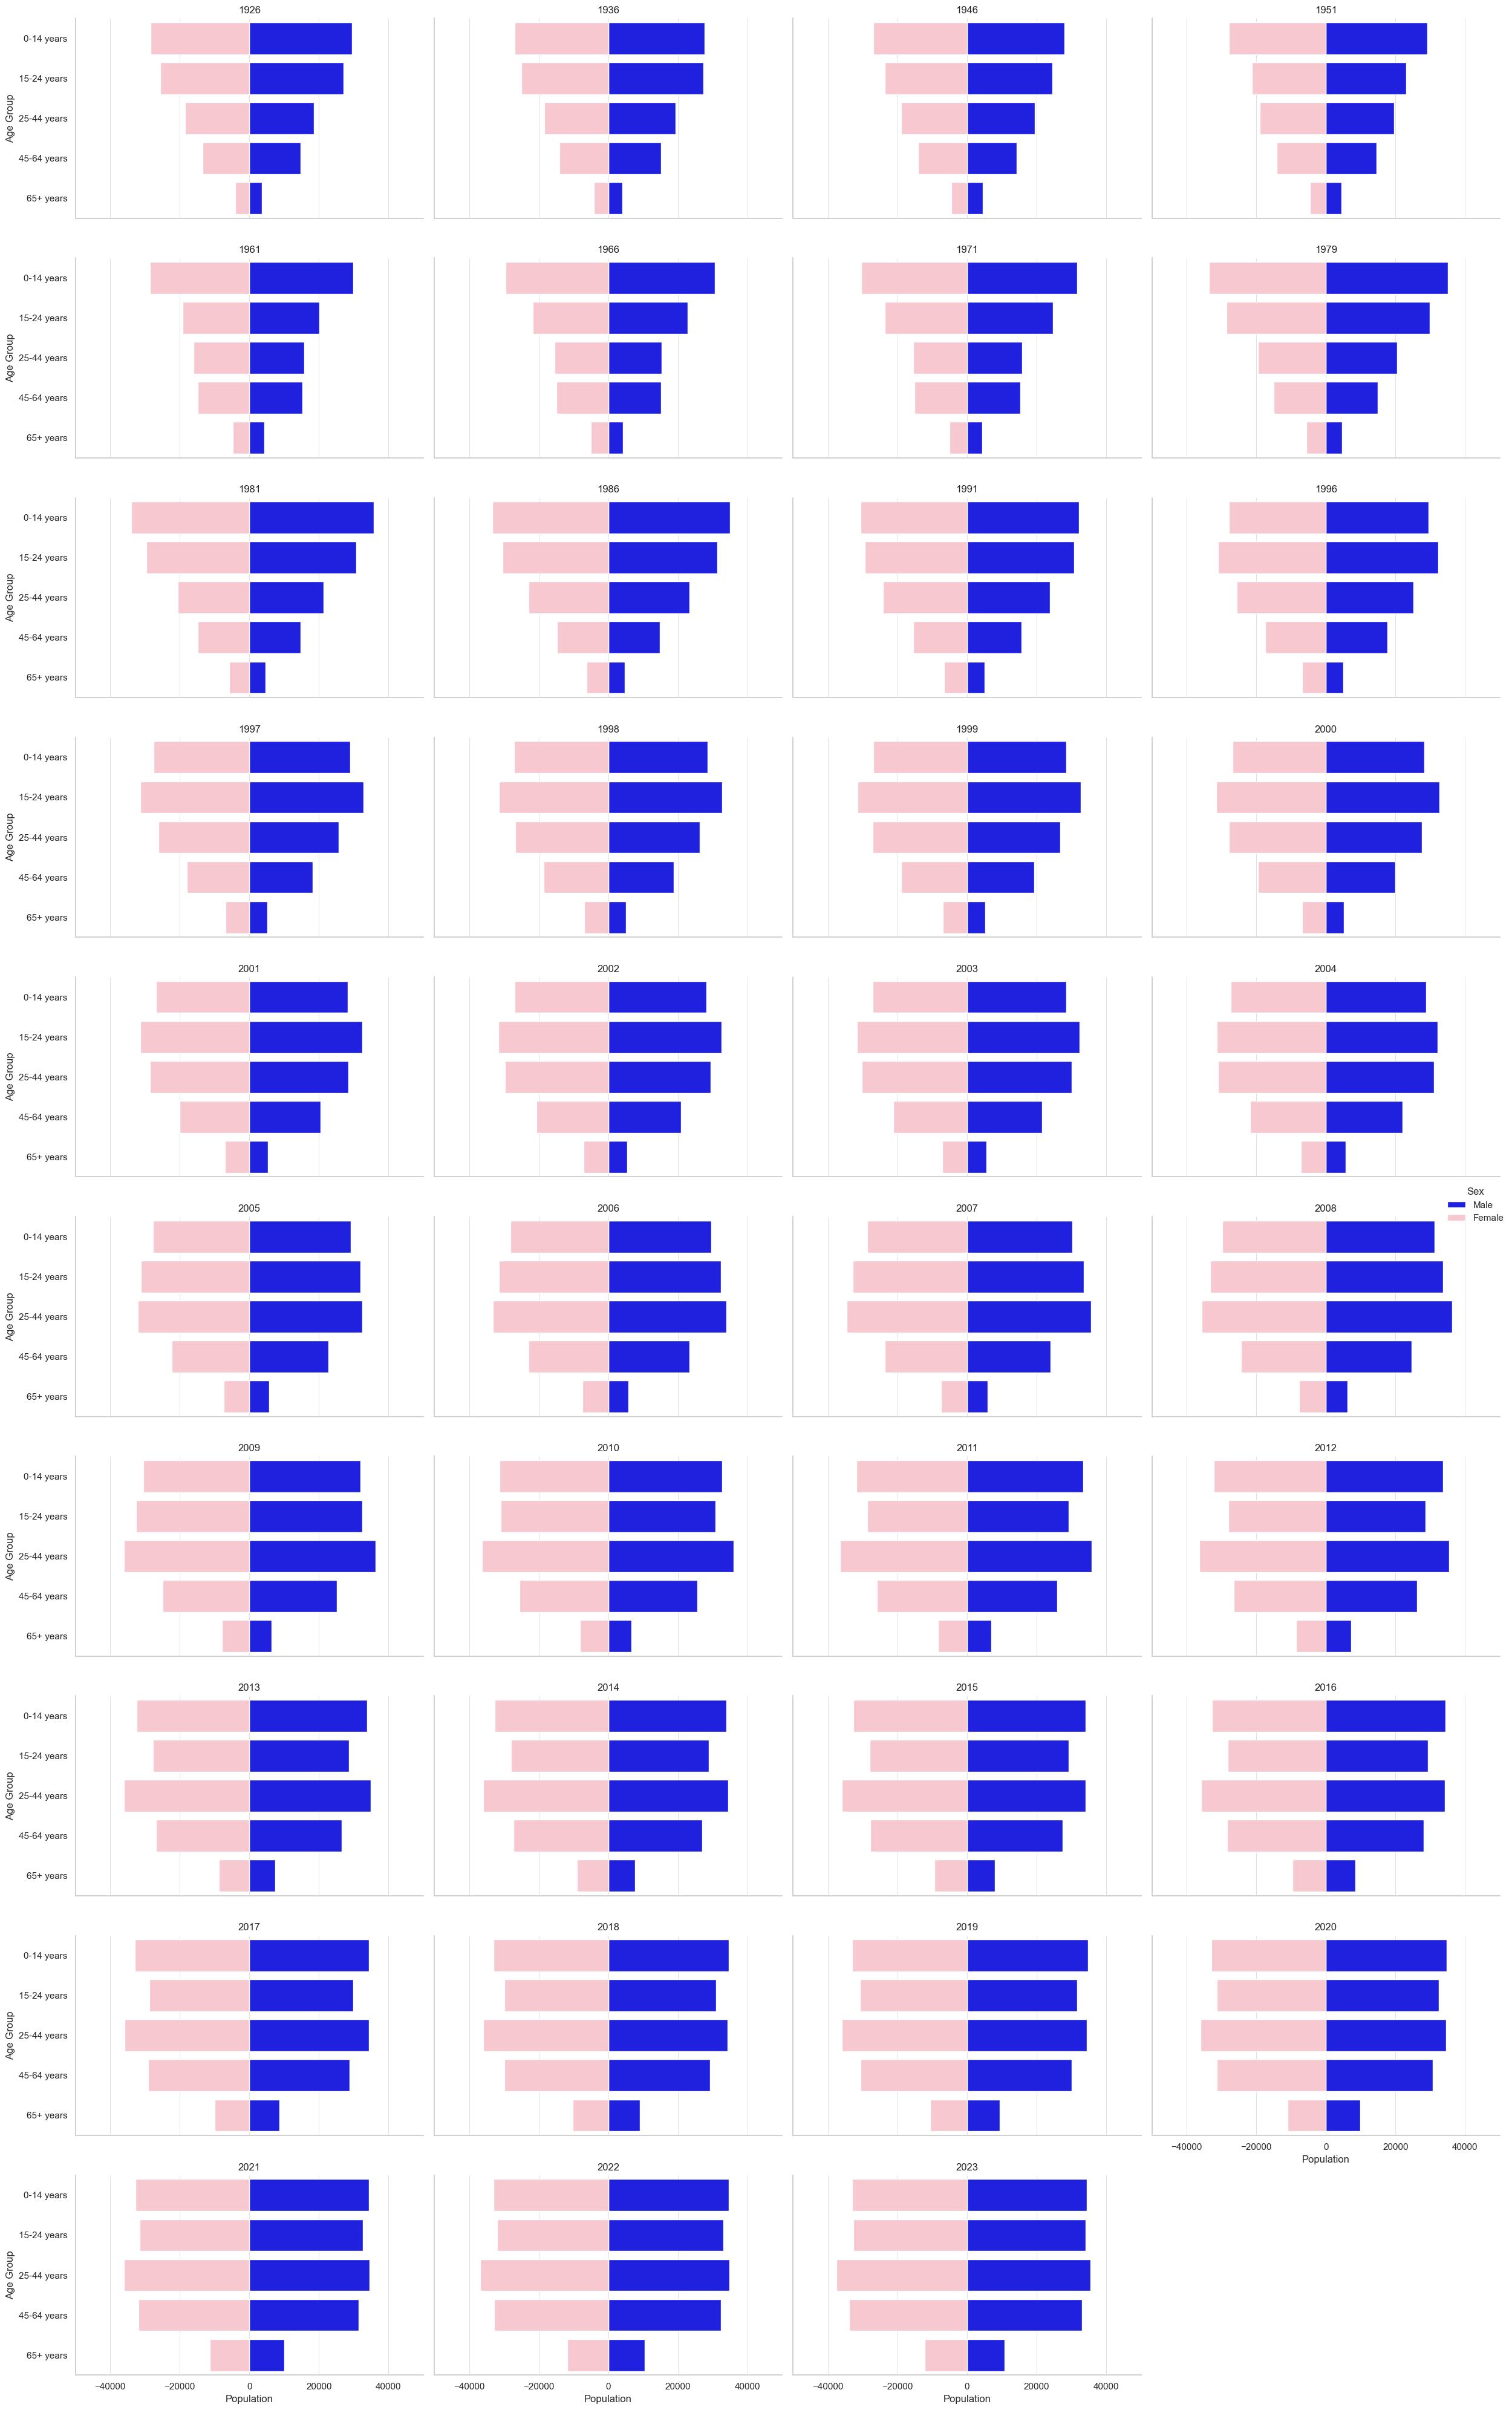

In [48]:

# Create a FacetGrid with 'Year' as the column variable so it makes a new grid every year
g = sns.FacetGrid(ages_male_female_df, col="Year", col_wrap=4, height=4, aspect=1.5)

# Create a pyramid chart for each year from 1926-2023
g.map_dataframe(sns.barplot, x="Population_manipulated", y="Age_group", hue="Sex", palette={"Male": "blue", "Female": "pink"}, errorbar=None,dodge=False)

# Set labels and title
g.set_axis_labels("Population", "Age Group")
g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.set_xlim(-50000, 50000)
    
    
# Ttitle and size of legend
g.add_legend(title="Sex")
for line in legend.get_lines():
    line.set_linewidth(8)
    
plt.tight_layout()
plt.show()


As seen from the age-sex distribution above at the early start of the data, as the age increases the population decreases with the 0-14 group being most populous, depicting a funnel shape over the years till 1996 where the 15-24 age group begins to overtake the 0-14 group. And from 2005-2023,the 25-44 group is steadily the most-populous group with the 65+ group constantly having the least population as the mortality rate is high due to age and other contributing factors

## Migration within Ireland

The age and gender distribution gives some insight as to the demographic in Ireland, a deep-dive will now be taken into the geographical population of the country and how

In [49]:
regions_df=pd.read_csv('PEA04.20231030T211055.csv')

After the csv file is read the basic EDA is performed on the data

In [50]:
regions_df.head(5)

,STATISTIC Label,Year,Age Group,Sex,Region,UNIT,VALUE
0,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,State,Thousand,356.0
1,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,Border,Thousand,30.7
2,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,West,Thousand,32.6
3,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,Mid-West,Thousand,35.0
4,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,South-East,Thousand,32.0


In [51]:
regions_df.tail()

,STATISTIC Label,Year,Age Group,Sex,Region,UNIT,VALUE
6664,Estimated Population (Persons in April),2023,All ages,Female,South-East,Thousand,237.5
6665,Estimated Population (Persons in April),2023,All ages,Female,South-West,Thousand,383.8
6666,Estimated Population (Persons in April),2023,All ages,Female,Dublin,Thousand,765.6
6667,Estimated Population (Persons in April),2023,All ages,Female,Mid-East,Thousand,391.3
6668,Estimated Population (Persons in April),2023,All ages,Female,Midland,Thousand,163.2


In [52]:
print ('Number of rows and columns respectively in the dataset:', regions_df.shape)

Number of rows and columns respectively in the dataset: (6669, 7)


In [53]:
regions_df.isna().sum()

STATISTIC Label    0
Year               0
Age Group          0
Sex                0
Region             0
UNIT               0
VALUE              0
dtype: int64

No missing values.

In [54]:
regions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6669 entries, 0 to 6668
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  6669 non-null   object 
 1   Year             6669 non-null   int64  
 2   Age Group        6669 non-null   object 
 3   Sex              6669 non-null   object 
 4   Region           6669 non-null   object 
 5   UNIT             6669 non-null   object 
 6   VALUE            6669 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 364.8+ KB


All columns have the apprpriate data type

In [55]:
regions_df.describe(include=object)

,STATISTIC Label,Age Group,Sex,Region,UNIT
count,6669,6669,6669,6669,6669
unique,1,19,3,9,1
top,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,Thousand
freq,6669,351,2223,741,6669


In [56]:
regions_df.describe()

,Year,VALUE
count,6669.000000,6669.000000
mean,2017.000000,75.670460
std,3.741938,281.512172
min,2011.000000,1.200000
25%,2014.000000,12.500000
50%,2017.000000,20.700000
75%,2020.000000,42.200000
max,2023.000000,5281.600000


Drop 'STATISTIC LABEL' and 'VALUE' as they only have 1 unique value

In [57]:
regions_df.drop(['STATISTIC Label','UNIT'], axis=1, inplace=True)

In [58]:
regions_df.shape

(6669, 5)

In [59]:
regions_df.head()

,Year,Age Group,Sex,Region,VALUE
0,2011,0 - 4 years,Both sexes,State,356.0
1,2011,0 - 4 years,Both sexes,Border,30.7
2,2011,0 - 4 years,Both sexes,West,32.6
3,2011,0 - 4 years,Both sexes,Mid-West,35.0
4,2011,0 - 4 years,Both sexes,South-East,32.0


In [60]:
regions_df.rename(columns={'Age Group':'Age_group','VALUE':'Population'},inplace=True)

In [61]:
regions_df.head()

,Year,Age_group,Sex,Region,Population
0,2011,0 - 4 years,Both sexes,State,356.0
1,2011,0 - 4 years,Both sexes,Border,30.7
2,2011,0 - 4 years,Both sexes,West,32.6
3,2011,0 - 4 years,Both sexes,Mid-West,35.0
4,2011,0 - 4 years,Both sexes,South-East,32.0


As the unit column has been removed, the population column will be manipulated to give the accurate value which can then be changed as needed for data display purposes

In [62]:
regions_df['Population']=regions_df['Population']*1000

In [63]:
regions_df.head()

,Year,Age_group,Sex,Region,Population
0,2011,0 - 4 years,Both sexes,State,356000.0
1,2011,0 - 4 years,Both sexes,Border,30700.0
2,2011,0 - 4 years,Both sexes,West,32600.0
3,2011,0 - 4 years,Both sexes,Mid-West,35000.0
4,2011,0 - 4 years,Both sexes,South-East,32000.0


In [64]:
regions_df['Region'].unique()

array(['State', 'Border', 'West', 'Mid-West', 'South-East', 'South-West',
       'Dublin', 'Mid-East', 'Midland'], dtype=object)

In [65]:
print('The sum of duplicated rows is:',regions_df.duplicated().sum())

The sum of duplicated rows is: 0


For clearer understanding of the data, according to CSO(2021), the region classification above is used to classify the 8 regions in Ireland and their respective counties:
* Border: Cavan, Donegal, Leitrim, Monaghan, Sligo
* West: Galway, Mayo, Roscommon
* Mid-West: Claire, Limerick, Tipperary
* South-East:Carlow, Kilkenny, Waterford, Wexford
* South-West: Cork, Kerry
* Dublin
* Mid-East: Kildare, Louth, Meath, Wicklow
* Midland: Laois, Longford, Offaly, Westmeath

The last reference to 'State' comprises of all 8 regions

For the ease of analysis and to avoid double counting data 4 different dataframes will be made
* All regions with male and female data
* All regions with both sexes
* State region with male and female data
* State region with both sexes

This will make it easy to be called upon as needed

In [68]:

both_sexes_state= regions_df[(regions_df['Sex'] == 'Both sexes') & (regions_df['Region'] == 'State')]


both_sexes_regions = regions_df[(regions_df['Sex'] == 'Both sexes') & (regions_df['Region'] != 'State')]


male_female_state = regions_df[(regions_df['Sex'] != 'Both sexes') & (regions_df['Region']=='State')]


male_female_regions=regions_df[(regions_df['Sex']!='Both sexes') & (regions_df['Region']!='State')]

In [69]:
male_female_regions.shape

(3952, 5)

In [70]:
male_female_state.shape

(494, 5)

In [71]:
both_sexes_state.shape

(247, 5)

In [72]:
both_sexes_regions.head()

,Year,Age_group,Sex,Region,Population
1,2011,0 - 4 years,Both sexes,Border,30700.0
2,2011,0 - 4 years,Both sexes,West,32600.0
3,2011,0 - 4 years,Both sexes,Mid-West,35000.0
4,2011,0 - 4 years,Both sexes,South-East,32000.0
5,2011,0 - 4 years,Both sexes,South-West,50100.0


A graph is plotted to see how the populatoin is distributed across Ireland

This will show how the population is spread across Ireland accounting for all ages and sexes

In [73]:
all_ages_both_sexes_regions = both_sexes_regions[both_sexes_regions['Age_group'] == 'All ages']
ages_both_sexes_regions = both_sexes_regions[both_sexes_regions['Age_group'] != 'All ages']


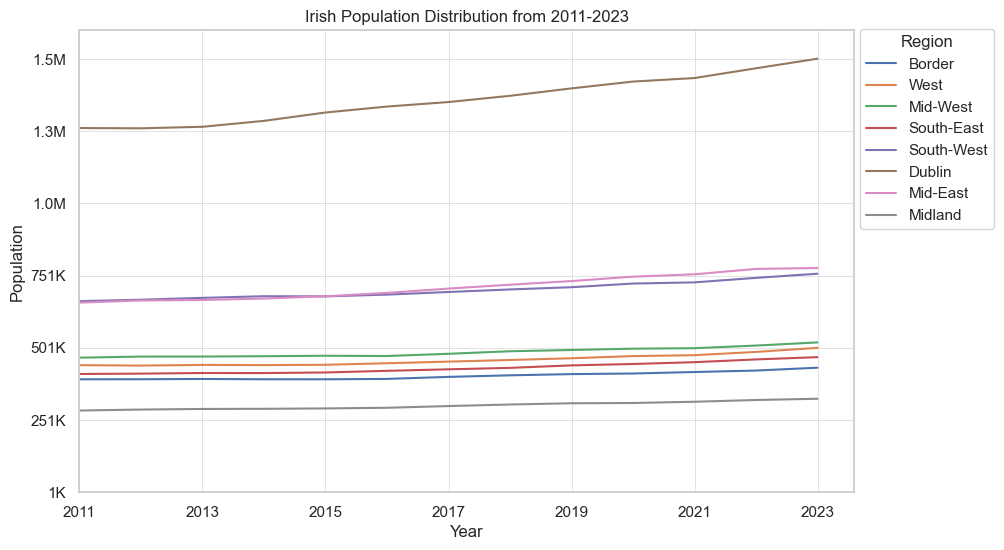

In [74]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", rc={"grid.linewidth": 0.4})



sns.lineplot(data=all_ages_both_sexes_regions, x='Year', y='Population', hue='Region')


plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Irish Population Distribution from 2011-2023')

#function to format axis based on if in thousands or millions
def custom_y_axis_formatter(x, pos):
    if x >= 1e6:  # Display 'M' for millions
        return f'{x/1e6:.1f}M'
    elif x >= 1e3:  # Display 'K' for thousands
        return f'{x/1e3:.0f}K'
    else:
        return str(int(x))

# Apply the custom formatter to the y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(custom_y_axis_formatter))

plt.legend()
legend = plt.legend(title='Region',loc="upper right", bbox_to_anchor=(1.19, 1.02))


plt.xlim(2011, None)  
plt.xticks(range(2011, 2024,2), rotation=0) 
plt.ylim(1000, 1600000) 
plt.yticks(range(1000,1600000,250000)) 
   

plt.show();


As seen from the data above, Dublin, as expected from the capital city, is the most populous region. However, what is interesting to note is the slopes of the lines, all other regions except dublin, exhibit a contant increase in populatoin over the years, to a degree but the population increase and effective slope has a steeper climb than the rest

The above graph only shows that Dublin is most populous region but it would be more beneficial to see how the population of these regions grew or declined over time. TO do this the percentage will be computed to account for the change in population per year

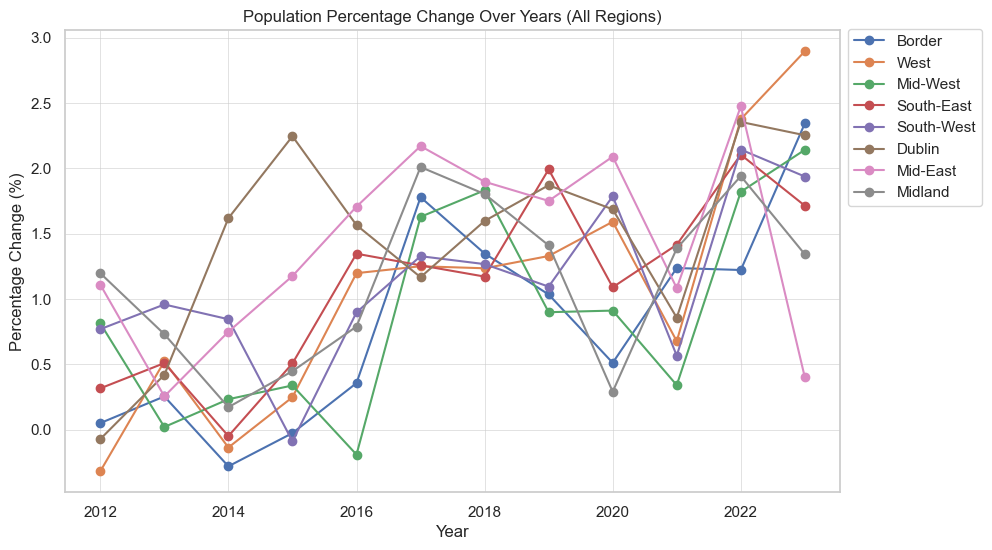

In [89]:
# Calculate the percentage change in population for each region
percentage_change_data = all_ages_both_sexes_regions.groupby('Region')['Population'].pct_change() * 100

# Create a new DataFrame with the percentage change data
percentage_change_df = pd.DataFrame({
    'Region': all_ages_both_sexes_regions['Region'],
    'Year': all_ages_both_sexes_regions['Year'],
    'Percentage_Change': percentage_change_data
})

# Extract unique regions from the 'Region' column
unique_regions = percentage_change_df['Region'].unique()

# Plot the percentage change for each region on the same graph
plt.figure(figsize=(10, 6))

for region in unique_regions:
    region_data = percentage_change_df[percentage_change_df['Region'] == region]
    plt.plot(region_data['Year'], region_data['Percentage_Change'], marker='o', linestyle='-', label=region)

plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.title('Population Percentage Change Over Years (All Regions)')
plt.legend(bbox_to_anchor=(1,1.02))
plt.grid(True)
plt.show()



To have more insight into the population distribution of Ireland, according to the Regional Statistics Team (2017),the regions can be further subclassified:
* Predominantly Urban: >80% live in Urban areas
* Intermediate: 50-80% live in Urban areas
* Predominantly Rural: >50% live in rural areas

According to the classification, there is only 1 predominantly urban area in Ireland (Dublin) whith the remaining 7 being Rural areas

From the graph above a general decline is seen from 2011-2014 in the rural regions, however dublin was the opposite with increasing population, this would suggest a period urbanisation.

Another point to note is the increased population growth across the country from 2021 to 2022

With the further classifcation of Rural vs Urban population, the population trend can be observed as below

In [106]:
all_ages_both_sexes_regions.loc[all_ages_both_sexes_regions['Region'] == 'Dublin', 'Rural_Urban'] = 'Urban'
all_ages_both_sexes_regions.loc[all_ages_both_sexes_regions['Region'] != 'Dublin', 'Rural_Urban'] = 'Rural'

In [110]:
all_ages_both_sexes_regions.head(24)

,Year,Age_group,Sex,Region,Population,Percentage_Change,Rural_Urban
487,2011,All ages,Both sexes,Border,391900.0,NaN,Rural
488,2011,All ages,Both sexes,West,440800.0,NaN,Rural
489,2011,All ages,Both sexes,Mid-West,466800.0,NaN,Rural
490,2011,All ages,Both sexes,South-East,410300.0,NaN,Rural
491,2011,All ages,Both sexes,South-West,662300.0,NaN,Rural
492,2011,All ages,Both sexes,Dublin,1261500.0,NaN,Urban
493,2011,All ages,Both sexes,Mid-East,657400.0,NaN,Rural
494,2011,All ages,Both sexes,Midland,283800.0,NaN,Rural
1000,2012,All ages,Both sexes,Border,392100.0,0.051033,Rural
1001,2012,All ages,Both sexes,West,439400.0,-0.317604,Rural


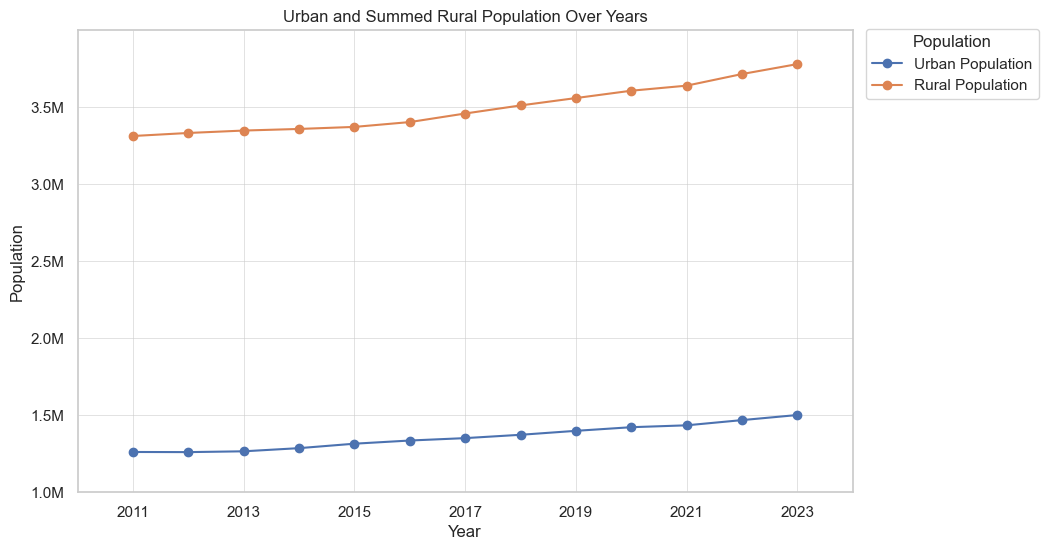

In [127]:
import matplotlib.pyplot as plt

# Filter the DataFrame for urban and rural populations
urban_population = all_ages_both_sexes_regions[all_ages_both_sexes_regions['Rural_Urban'] == 'Urban']

# Group and sum the rural populations by year
rural_population = all_ages_both_sexes_regions[all_ages_both_sexes_regions['Rural_Urban'] == 'Rural']
rural_population = rural_population.groupby('Year')['Population'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))

# Plot the urban population
plt.plot(urban_population['Year'], urban_population['Population'], label='Urban Population', marker='o', linestyle='-')

# Plot the rural population (summed)
plt.plot(rural_population['Year'], rural_population['Population'], label='Rural Population', marker='o', linestyle='-')

plt.xlim(2010, 2024)  
plt.xticks(range(2011, 2024,2), rotation=0)  
plt.ylim(1000000, 4000000)
plt.yticks(range(1000000,4000000,500000))  
   

def reformat_y(y, pos):
   return f'{y / 1000000:.1f}M'


plt.gca().yaxis.set_major_formatter(y_format)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Urban and Summed Rural Population Over Years')
plt.legend()
legend = plt.legend(title='Population',loc="upper right", bbox_to_anchor=(1.25, 1.02))
plt.grid(True)

plt.show()


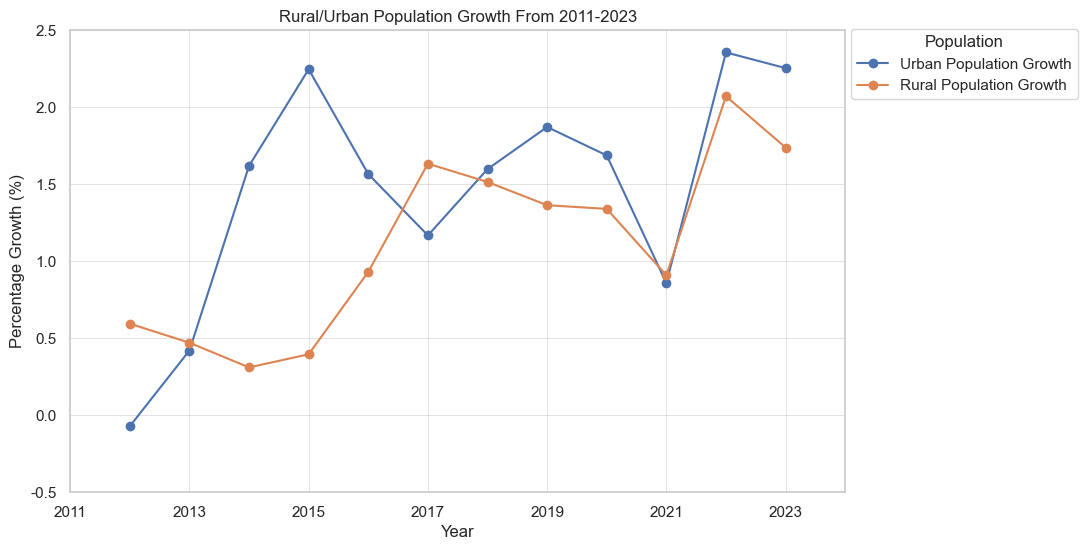

In [153]:
# DataFrame is filtered for urban and rural populations
urban_population = all_ages_both_sexes_regions[all_ages_both_sexes_regions['Rural_Urban'] == 'Urban']

#Code gave a warning as it seems to favour making a copy dataframe than editing teh dataframe
#Code still works as intended but for readability, a copy is made to remove the warning
urban_population = urban_population.copy()


urban_population['Percentage_Growth'] = urban_population['Population'].pct_change() * 100

# Group and sum the rural populations by year
rural_population = all_ages_both_sexes_regions[all_ages_both_sexes_regions['Rural_Urban'] == 'Rural']
rural_population = rural_population.groupby('Year')['Population'].sum().reset_index()

rural_population = rural_population.copy()

# Calculate the percentage growth for summed rural population
rural_population['Percentage_Growth'] = rural_population['Population'].pct_change() * 100


plt.figure(figsize=(10, 6))
plt.plot(urban_population['Year'], 
         urban_population['Percentage_Growth'], label='Urban Population Growth', marker='o', linestyle='-')


plt.plot(rural_population['Year'],
         rural_population['Percentage_Growth'], label='Rural Population Growth', marker='o', linestyle='-')


plt.xlim(2011, 2024)  
plt.xticks(range(2011, 2024,2), rotation=0)  
plt.ylim(-0.5, 2.5)

#float value not compatible so code modified
ytick_positions = [i / 2.0 for i in range(-1, 6)]
plt.yticks(ytick_positions, [str(i) for i in ytick_positions])
plt.xlabel('Year')
plt.ylabel('Percentage Growth (%)')
plt.title('Rural/Urban Population Growth From 2011-2023')
plt.legend()
legend = plt.legend(title='Population',loc="upper right", bbox_to_anchor=(1.31, 1.02))
plt.grid(True)

plt.show()


Over the years theres been an increase in urban population compared to 2011, important to see from 2019 to 2021 both populations reducing which could be indicator of migration as a result of the COvid 19 pandemic

## LINEAR REGRESSION MODEL POPULATION PREDICTION

The prediction of Ireland population will now be predicted using a number of ML methods


Code to recall previous graph instead of scrolling to target graph or rewritin line of code

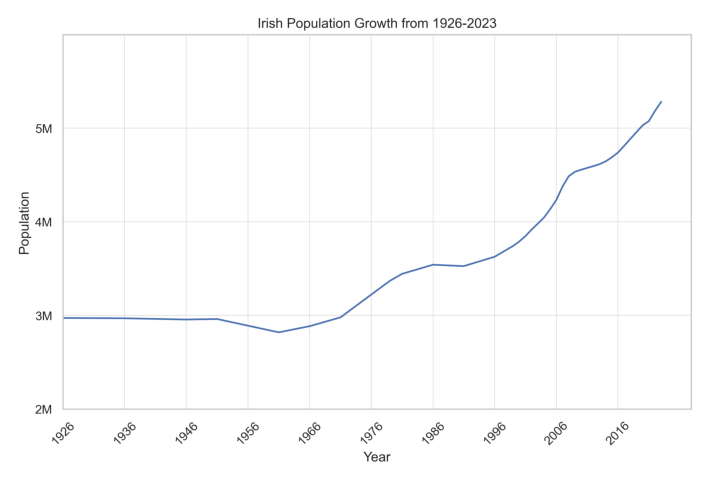

In [159]:
img = plt.imread('Irish Population Growth (1926-2023).png') 
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off') 
plt.show()

Import Libraries required for ML model

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Recall dataset to be used

In [272]:
allages_both_sexes_df.head()

,Year,Age,Sex,Population
0,1926,All ages,Both sexes,2971992
303,1936,All ages,Both sexes,2968420
606,1946,All ages,Both sexes,2955107
909,1951,All ages,Both sexes,2960593
1212,1961,All ages,Both sexes,2818341


Dependent (y) and Independent (X) variables assigned

In [273]:
# Assuming you have a 'Population' column and other feature columns
X = allages_both_sexes_df['Year']  
y = allages_both_sexes_df['Population']

In [279]:
allages_both_sexes_df.head()

,Year,Age,Sex,Population
0,1926,All ages,Both sexes,2971992
303,1936,All ages,Both sexes,2968420
606,1946,All ages,Both sexes,2955107
909,1951,All ages,Both sexes,2960593
1212,1961,All ages,Both sexes,2818341


Mean Squared Error: 101613227666.74
Mean Absolute Error: 297807.42
R-squared (R2) Score: 1.00


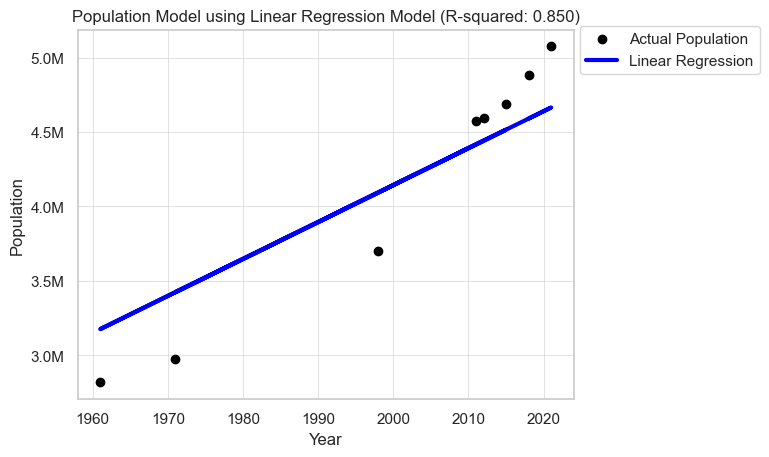

In [360]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X = allages_both_sexes_df['Year']
y=allages_both_sexes_df['Population']
X = X.values.reshape(-1, 1)  
y = y.values.reshape(-1, 1) 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
L_r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

# Plot the results
plt.scatter(X_test, y_test, color='black', label='Actual Population')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title(f'Population Model using Linear Regression Model (R-squared: {L_r2:.3f})')
plt.legend(loc='upper right', bbox_to_anchor=(1.39,1.03))


plt.gca().yaxis.set_major_formatter(y_format)
plt.grid(True)
plt.show()


User input

In [333]:
user_input_year = int(input("Enter a year to predict the population: "))

user_input = np.array(user_input_year).reshape(1, -1)

# Use the trained linear regression model to make a population prediction
predicted_population = model.predict(user_input)

# Print the predicted population
formatted_prediction = '{:,.0f}'.format(predicted_population[0][0])
print(f"Predicted population for year {user_input_year}: {formatted_prediction}", 'people.')


Enter a year to predict the population: 2023
Predicted population for year 2023: 4,714,251 people.


## KNN Modelling

In [294]:
from sklearn.neighbors import KNeighborsRegressor

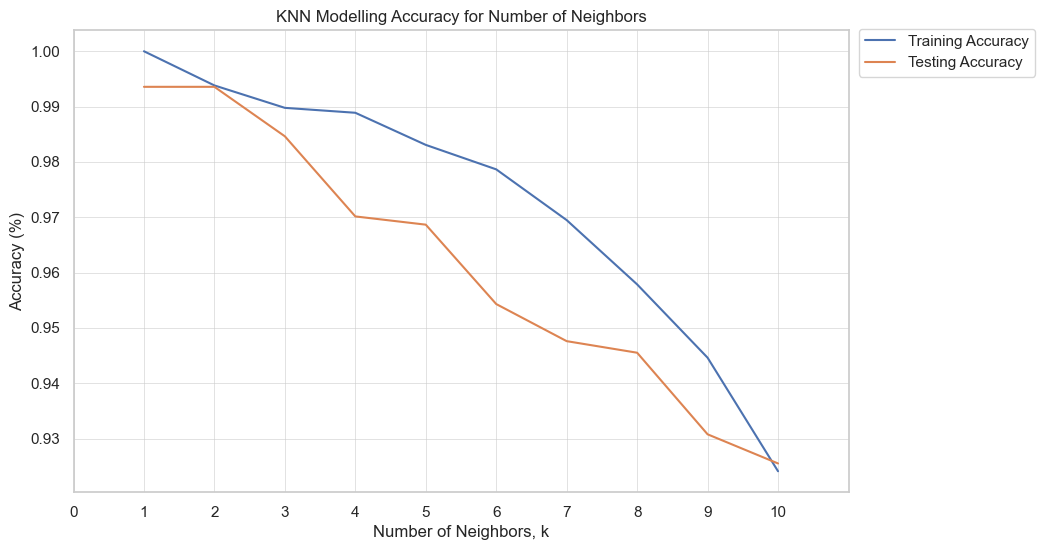

In [313]:
X_k = allages_both_sexes_df['Year']
y_k = allages_both_sexes_df['Population']
X_k = X_k.values.reshape(-1, 1)
y_k = y_k.values.reshape(-1, 1)
train_accuracy = []
test_accuracy = []
neighbors_range = range(1, 11)  # Correct variable name

X_k_train, X_k_test, y_k_train, y_k_test = train_test_split(X_k, y_k, test_size=0.2, random_state=42)

for k in neighbors_range:  # Correct variable name
    k_model = KNeighborsRegressor(n_neighbors=k)
    k_model.fit(X_k_train, y_k_train)

    y_k_train_pred = k_model.predict(X_k_train)
    y_k_test_pred = k_model.predict(X_k_test)

    k_train_r2 = r2_score(y_k_train, y_k_train_pred)
    k_test_r2 = r2_score(y_k_test, y_k_test_pred)

    train_accuracy.append(k_train_r2)
    test_accuracy.append(k_test_r2)

plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, train_accuracy, label="Training Accuracy")
plt.plot(neighbors_range, test_accuracy, label="Testing Accuracy")
plt.xlabel("Number of Neighbors, k")
plt.xlim(0, 11)  
plt.xticks(range(0, 11,1), rotation=0) 
plt.ylabel("Accuracy (%)")
plt.title("KNN Modelling Accuracy for Number of Neighbors")
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1.02))
plt.grid(True)
plt.show()


From above, it is seen that the optimum number of neighbours is 2 as the accuracies of training and testing are both high and similar. In the cases of underfitting or overfitting, they would be either dissimilar and/or low

Evaluate Model

In [350]:
optimal_k = 2
knn_model = KNeighborsRegressor(n_neighbors=optimal_k)
knn_model.fit(X_k_train, y_k_train)

y_k_test_pred = knn_model.predict(X_k_test)


knn_r2 = r2_score(y_k_test, y_k_test_pred)
knn_mse = mean_squared_error(y_k_test, y_k_test_pred)
knn_mae = mean_absolute_error(y_k_test, y_k_test_pred)


print(f'KNN R-squared (R2) Score: {knn_r2:.3f}')
print(f'KNN Mean Squared Error: {knn_mse:.2f}')
print(f'KNN Mean Absolute Error: {knn_mae:.2f}')

KNN R-squared (R2) Score: 0.994
KNN Mean Squared Error: 4345312067.25
KNN Mean Absolute Error: 41113.38


User input

In [321]:
k_user_input = int(input("Enter a year to predict the population: "))

# Reshape the user input for prediction
k_user_input = np.array(k_user_input).reshape(1, -1)

knn_model = KNeighborsRegressor(n_neighbors=2)
knn_model.fit(X_k, y_k)

predicted_population = knn_model.predict(k_user_input)

# Extract the prediction as a regular integer, then format it
predicted_population = int(predicted_population)
formatted_prediction = '{:,.0f}'.format(predicted_population)
print(f"Predicted population in Ireland in {k_user_input[0][0]}: {formatted_prediction}",'people')


Enter a year to predict the population: 2023
Predicted population in Ireland in 2023: 5,232,789 people


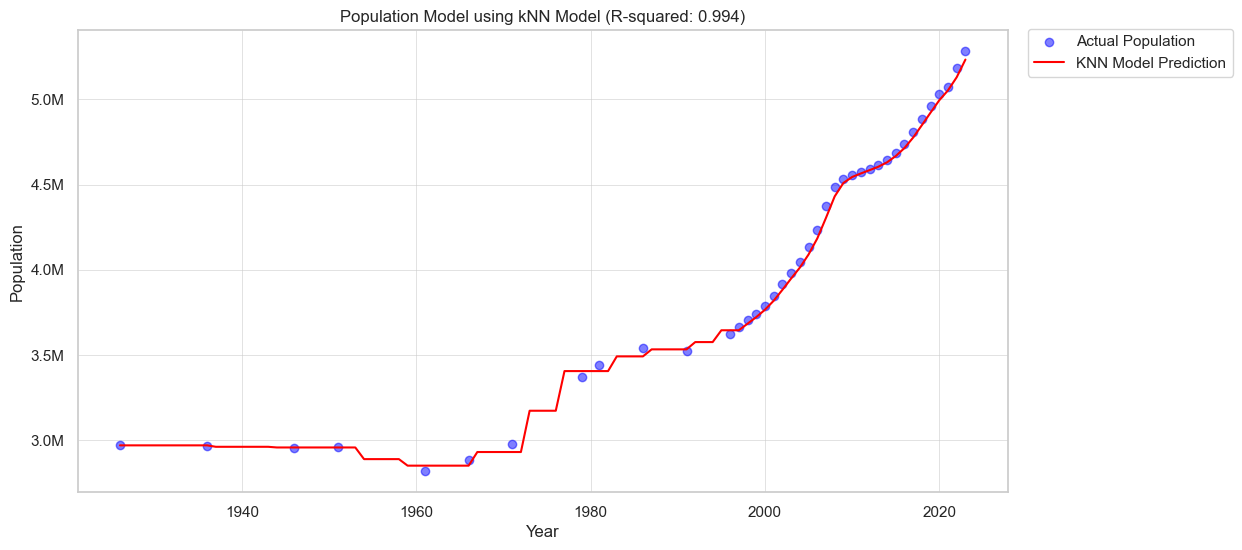

In [359]:
best_k = 2  # You can replace this with the number of neighbors you found to be the best
knn_model = KNeighborsRegressor(n_neighbors=best_k)
knn_model.fit(X_k, y_k)

# Create a range of years for prediction
years_for_prediction = np.array(range(1926, 2024)).reshape(-1, 1)

# Get KNN model predictions
predicted_population = knn_model.predict(years_for_prediction)

# Actual population data
actual_population = y_k

# Plot actual population data
plt.figure(figsize=(12, 6))
plt.scatter(X_k, y_k, label="Actual Population", color="blue", marker="o", alpha=0.5)

# Plot KNN model predictions
plt.plot(years_for_prediction, predicted_population, label="KNN Model Prediction", color="red")

plt.xlabel("Year")
plt.ylabel("Population")
plt.title(f'Population Model using kNN Model (R-squared: {knn_r2:.3f})')
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1.02))
plt.grid(True)

plt.gca().yaxis.set_major_formatter(y_format)

plt.show()


## Random Forest 

In [337]:
from sklearn.ensemble import RandomForestRegressor

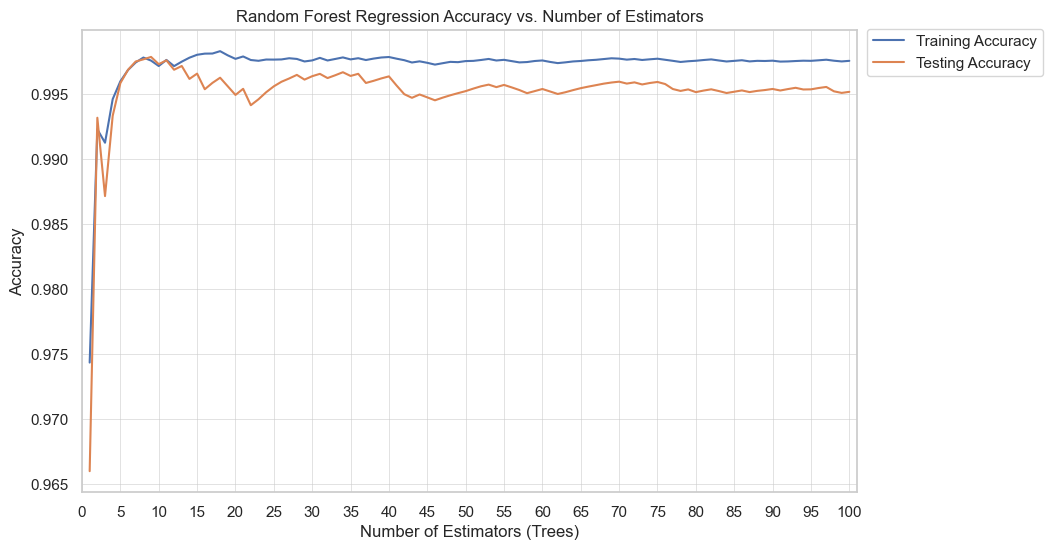

In [345]:
X_k_train, X_k_test, y_k_train, y_k_test = train_test_split(X_k, y_k, test_size=0.2, random_state=42)


train_R2_values = []
test_R2_values = []


estimators_range = range(1, 101)

for n_estimators in estimators_range:
    
    R_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    R_model.fit(X_k_train, y_k_train.ravel())

    
    train_R2 = R_model.score(X_k_train, y_k_train.ravel())
    test_R2 = R_model.score(X_k_test, y_k_test.ravel())

    train_R2_values.append(train_R2)
    test_R2_values.append(test_R2)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, train_R2_values, label="Training Accuracy")
plt.plot(estimators_range, test_R2_values, label="Testing Accuracy")
plt.xlabel("Number of Estimators (Trees)")
plt.xlim(0,101)  
plt.xticks(range(0,101,5), rotation=0) 
plt.ylabel("Accuracy")
plt.title("Random Forest Regression Accuracy vs. Number of Estimators")
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1.02))
plt.grid(True)
plt.show()



In [ ]:
Zoom into graph to see optimum number of estimators

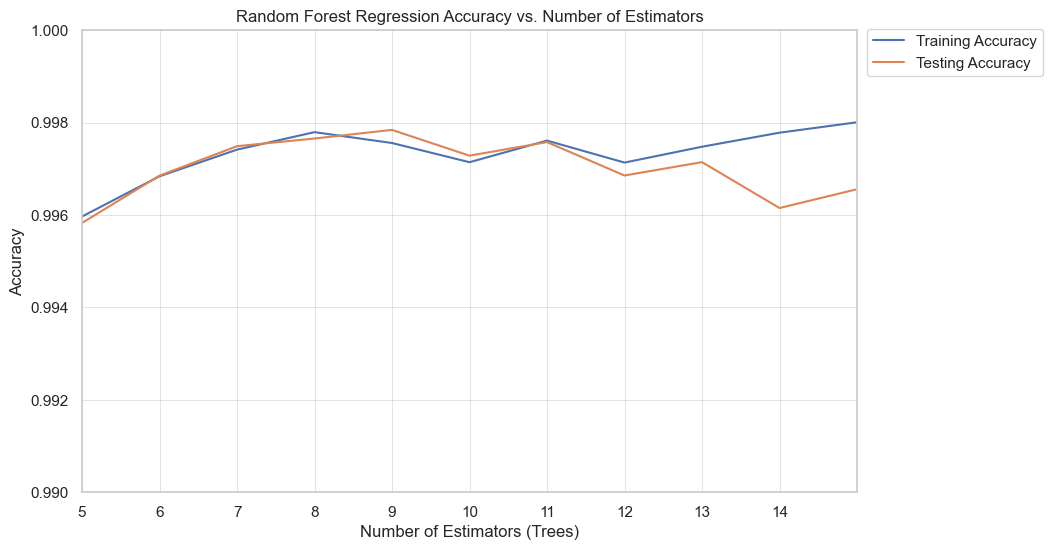

In [346]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, train_R2_values, label="Training Accuracy")
plt.plot(estimators_range, test_R2_values, label="Testing Accuracy")
plt.xlabel("Number of Estimators (Trees)")
plt.xlim(5,15)  
plt.xticks(range(5,15,1), rotation=0) 
plt.ylabel("Accuracy")
plt.ylim(0.99,1)  
plt.title("Random Forest Regression Accuracy vs. Number of Estimators")
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1.02))
plt.grid(True)
plt.show()



Due to high accuracy and similarity in training and test accuracy, 11 is picked as the number of estimators and evaluated below

In [351]:
R_model = RandomForestRegressor(n_estimators=11, random_state=42)
R_model.fit(X_k_train, y_k_train.ravel())

# Make predictions on the test data
y_R_pred = R_model.predict(X_test)

# Calculate and print evaluation metrics
mse = mean_squared_error(y_k_test.ravel(), y_pred)
mae = mean_absolute_error(y_k_test.ravel(), y_pred)
r2 = r2_score(y_k_test.ravel(), y_R_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared (R2) Score: {r2:.3f}')

Mean Squared Error: 101613227666.74
Mean Absolute Error: 297807.42
R-squared (R2) Score: 0.998


In [352]:
R_user_input = int(input("Enter a year to predict the population: "))

R_user_input = np.array(R_user_input).reshape(1, -1)

R_predicted_population = R_model.predict(R_user_input)


R_predicted_population = int(R_predicted_population)
R_formatted_prediction = '{:,.0f}'.format(R_predicted_population)
print(f"Predicted population in Ireland in {R_user_input[0][0]}: {R_formatted_prediction}",'people')

Enter a year to predict the population: 2023
Predicted population in Ireland in 2023: 5,218,087 people


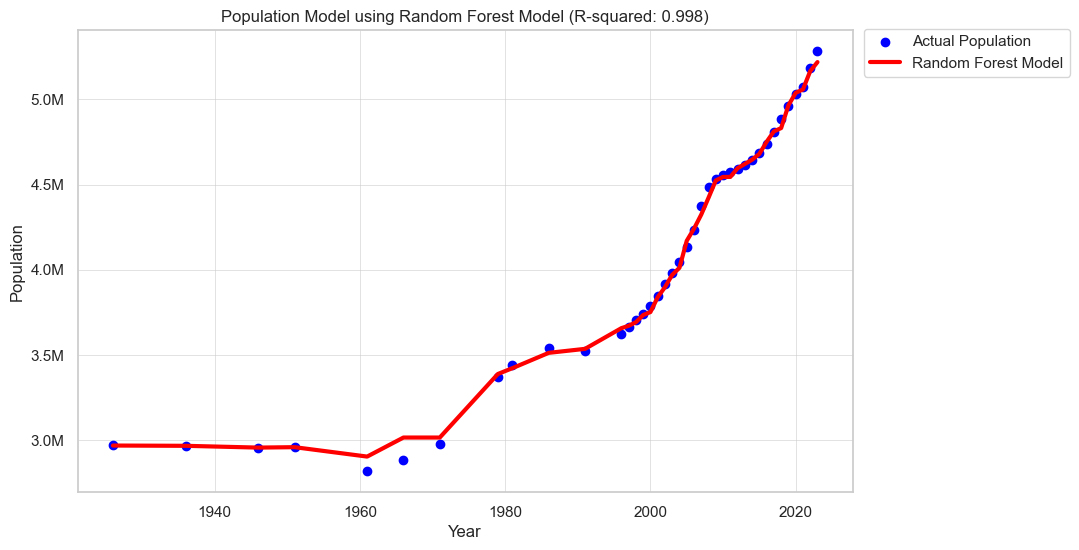

In [361]:
# Predict population using the Random Forest model
R_y_pred = R_model.predict(X)

# Calculate the R-squared (R2) score
r2 = r2_score(y, R_y_pred)

# Plot the actual data and the Random Forest model predictions
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Population')
plt.plot(X, R_y_pred, color='red', linewidth=3, label='Random Forest Model')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title(f'Population Model using Random Forest Model (R-squared: {r2:.3f})')
plt.legend(loc='upper right', bbox_to_anchor=(1.29,1.02))
plt.gca().yaxis.set_major_formatter(y_format)
plt.grid(True)
plt.show()

Random Forest has the highest accuracy of 99.8%

## References
* CSO (2021) Standard counties and nuts regions - CSO - central statistics office, CSO. Available at: https://www.cso.ie/en/methods/classifications/standardcountiesandnutsregions/ (Accessed: 30 October 2023).
* Joseph, V.R. (2022) ‘Optimal ratio for data splitting’, Statistical Analysis and Data Mining: The ASA Data Science Journal, 15(4), pp. 531–538. doi:10.1002/sam.11583. 
* Lane, D.M. (2003) Introduction to statistics. Minneapolis, MN: Open Textbook Library. 
* Tufte, E.R. (2018) The visual display of quantitative information. Cheshire, CT: Graphics Press. 
* Regional Statistics Team. (2017). Archive:Urban-rural typology update. Eurostats Statistics Explained, ISSN 2314-9647